In [ ]:
# 작업이 진행되는 곳을 변경

%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


#문제 정의
* input data : length, diameter, height, whole weight, shucked weight, viecera weight, shell weight, (water, volume, round, generation)
* output data : Target(age)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kurtosis, skew
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
import joblib

In [ ]:
train = pd.read_csv('./train2.csv')
#pandas의 dataframe 형식으로 불러오기

In [ ]:
train.head()

,Unnamed: 0,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [ ]:
train.shape
#row col

(1127, 11)

In [ ]:
#data들의 자료형
tcolumns = train.columns[:]
for i in range(11):
  print(tcolumns[i], ':', train[tcolumns[i]].dtype)

Unnamed: 0 : int64
id : int64
Gender : object
Lenght : float64
Diameter : float64
Height : float64
Whole Weight : float64
Shucked Weight : float64
Viscra Weight : float64
Shell Weight : float64
Target : int64


gender만 categorical
나머지는 numerical type

In [ ]:
#각 feature에서의 unique의 개수
for i in range(11):
  print(tcolumns[i],':',train[tcolumns[i]].nunique())


Unnamed: 0 : 1127
id : 1127
Gender : 3
Lenght : 125
Diameter : 100
Height : 44
Whole Weight : 959
Shucked Weight : 804
Viscra Weight : 611
Shell Weight : 502
Target : 22


In [ ]:
print(train.groupby('Unnamed: 0').count().iloc[:,0])
print(train.groupby('id').count().iloc[:,0])
#unnamed = id -1 관계 필요 없음

Unnamed: 0
0       1
1       1
2       1
3       1
4       1
       ..
1247    1
1248    1
1250    1
1251    1
1252    1
Name: id, Length: 1127, dtype: int64
id
1       1
2       1
3       1
4       1
5       1
       ..
1248    1
1249    1
1251    1
1252    1
1253    1
Name: Unnamed: 0, Length: 1127, dtype: int64


In [ ]:
train = train.drop(columns = ['id'],axis = 1)
train = train.drop(columns = ['Unnamed: 0'], axis = 1)
#필요없는 feature 삭제

In [ ]:
numerical_features = train.select_dtypes(include = [np.number]).columns
categorical_features = train.select_dtypes(include = [np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
def check_missing_col(dataframe):
  missing_col = []
  counted_missing_col = 0
  for i,col in enumerate(dataframe.columns):
    missing_values = sum(dataframe[col].isna())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      counted_missing_col += 1
      print(f'결측치가 있는 col은 : {col}입니다')
      print(f'해당 col에 총 {missing_values}개의 결측치가 존재합니다')
      missing_col.append([col,dataframe[col].dtype])
  if counted_missing_col ==0:
    print('결측치가 존재 X')
  return missing_col

missing_col = check_missing_col(train)
#결측치가 존재하지 않으면 좋은데 존재할 경우
#결측치 분포나 갯수를 보고 삭제, 무시 또는 삽입을 해야됨

결측치가 존재 X


In [ ]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [ ]:
train.describe()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [ ]:
temp = train['Target'].unique()
np.sort(temp)
#target 나이의 분포

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29])

In [ ]:
train.groupby('Target').count().iloc[:,0]
# 나이별 전복의 개수
#,0은 열 하나의 결과만 출력

Target
3       4
4      14
5      35
6      78
7      92
8     156
9     183
10    181
11    129
12     68
13     58
14     38
15     21
16     19
17     13
18     10
19      7
20     10
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

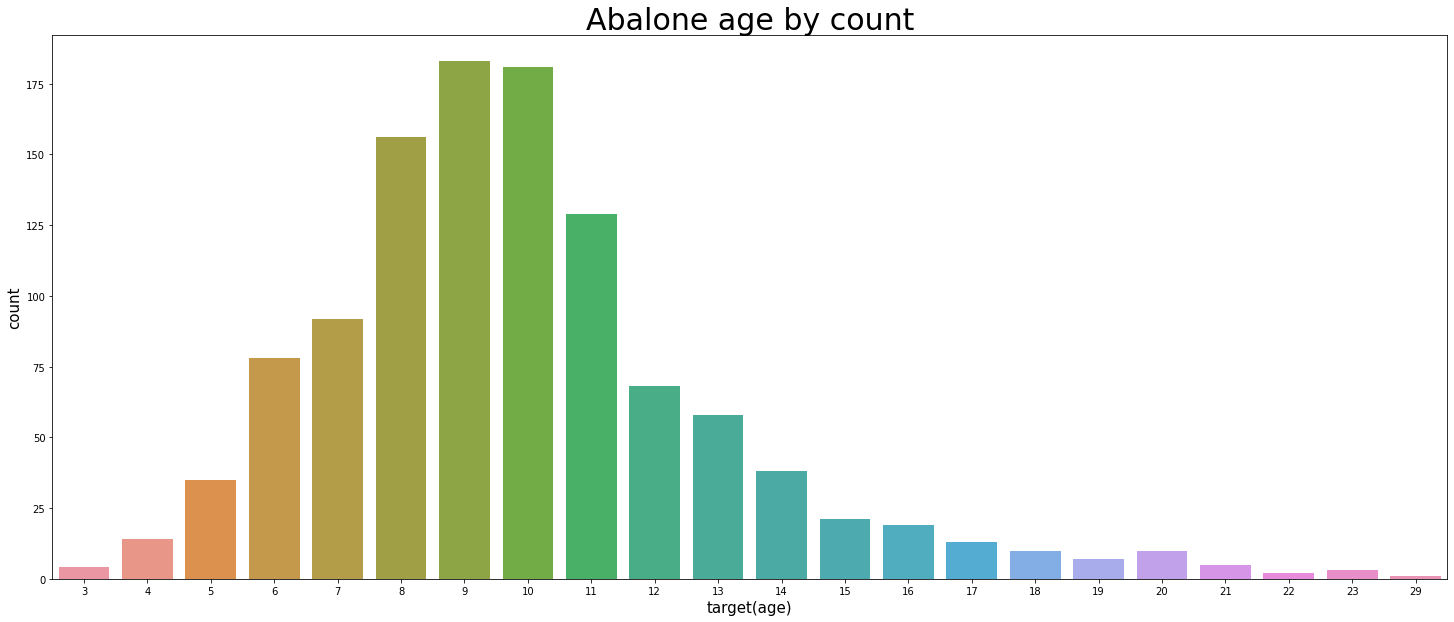

In [ ]:
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target', data= train) #train 파일에서 target의 count
plt.title('Abalone age by count', fontsize = 30)
plt.xlabel('target(age)', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [ ]:
#백분위수 구하기
print(train.Target.quantile(.25))
print(train.Target.quantile(.50))
print(train.Target.quantile(.75))

8.0
10.0
11.0


8 ~ 11에 몰려있음

In [ ]:
print(skew(train.Target)) #왜도 값이 양수 -> 평균이 정규분포의 평균보다 왼쪽에 치우쳐짐
print(kurtosis(train.Target, fisher = True)) #정규분포의 첨도가 0일 때

1.1728785677286027
2.6339293334774476


In [ ]:
temp1 = train['Target'] == 29
temp2 = train['Target'] == 23
train[temp1 | temp2]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
505,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
598,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
775,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23
1010,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23


In [ ]:
temp3 = train['Target'] == 3
temp4 = train['Target'] == 4
train[temp3 | temp4]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
76,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
236,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
335,I,0.275,0.195,0.070,0.0875,0.0345,0.0220,0.0255,4
401,M,0.245,0.180,0.065,0.0635,0.0245,0.0135,0.0200,4
403,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
469,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,4
519,M,0.195,0.145,0.050,0.0320,0.0100,0.0080,0.0120,4
755,M,0.165,0.125,0.040,0.0245,0.0095,0.0045,0.0080,4
759,I,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.0110,4
784,I,0.200,0.150,0.040,0.0460,0.0210,0.0070,0.0065,4


이 data에서 나이가 어린 개체와 많은 개체 사이의 눈에 띄는 차이점은 성별

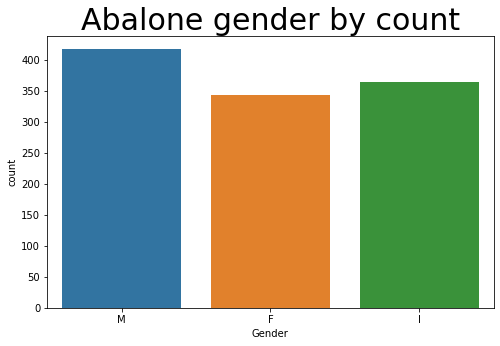

In [ ]:
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data = train)
plt.title('Abalone gender by count', fontsize = 30)
plt.show()

이 data에서는 성별의 분포가 고른 편

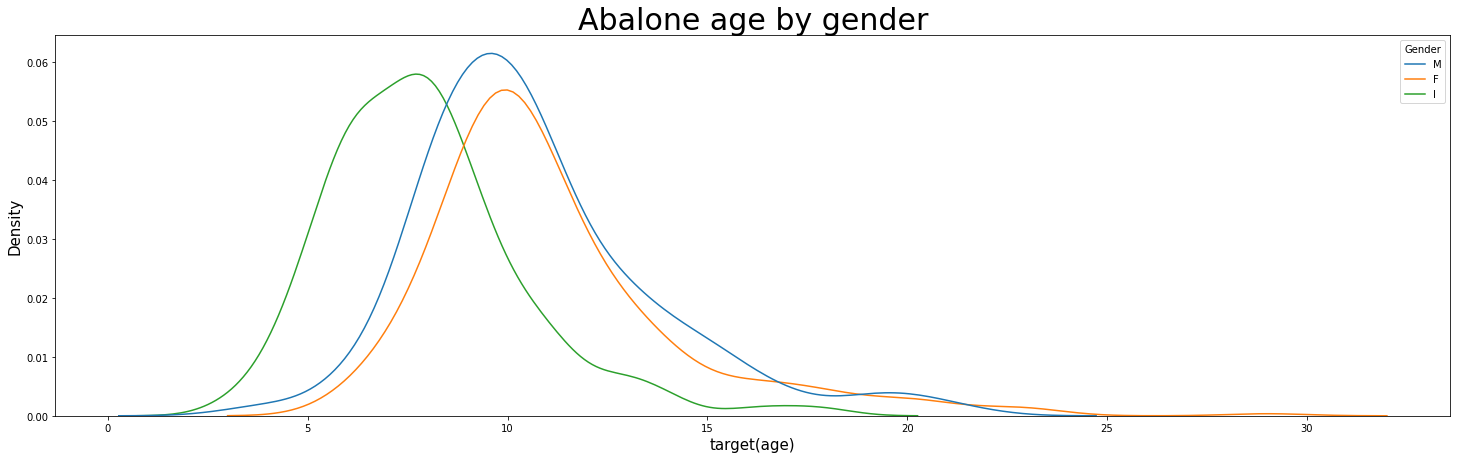

In [ ]:
plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue = 'Gender', data = train)
plt.title('Abalone age by gender', fontsize = 30)
plt.xlabel('target(age)', fontsize = 15)
plt.ylabel('Density', fontsize = 15) #밀도
plt.show()

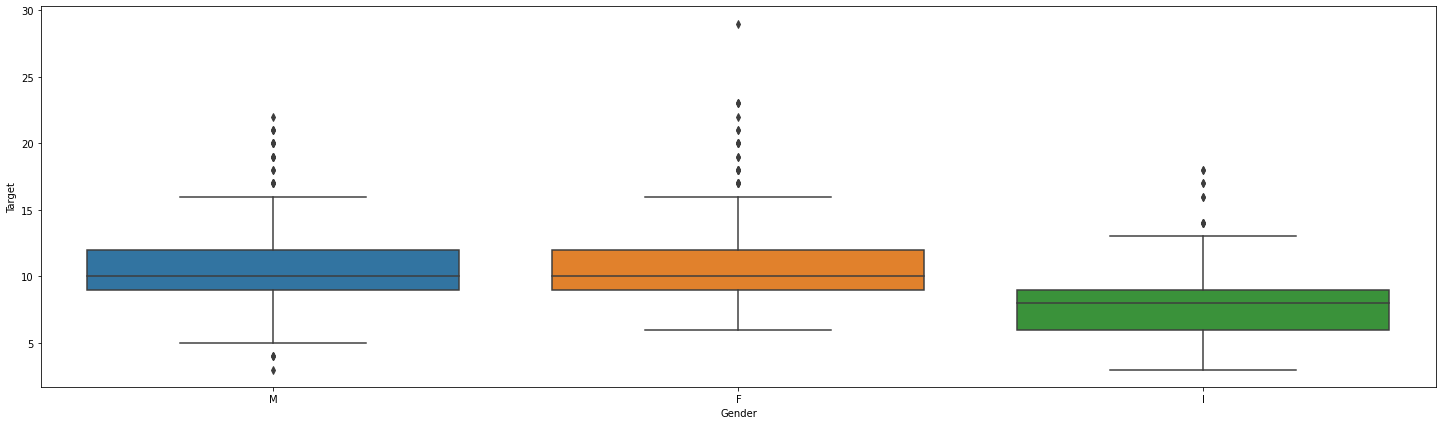

In [ ]:
sns.boxplot(x = 'Gender', y = 'Target', data = train)

데이터에서 gender I는 M과 F에 비해 나이가 어린 곳에서 밀도가 높게 형성..

F의 성별이 나머지 성별보다 나이가 많은 곳에서 밀도가 높게 형성

In [ ]:
train.groupby('Gender').Target.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,344.0,11.122093,3.222041,6.0,9.0,10.0,12.0,29.0
I,365.0,7.926027,2.452294,3.0,6.0,8.0,9.0,18.0
M,418.0,10.674641,3.042367,3.0,9.0,10.0,12.0,22.0


성별에 따른 target의 describe 호출

In [ ]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


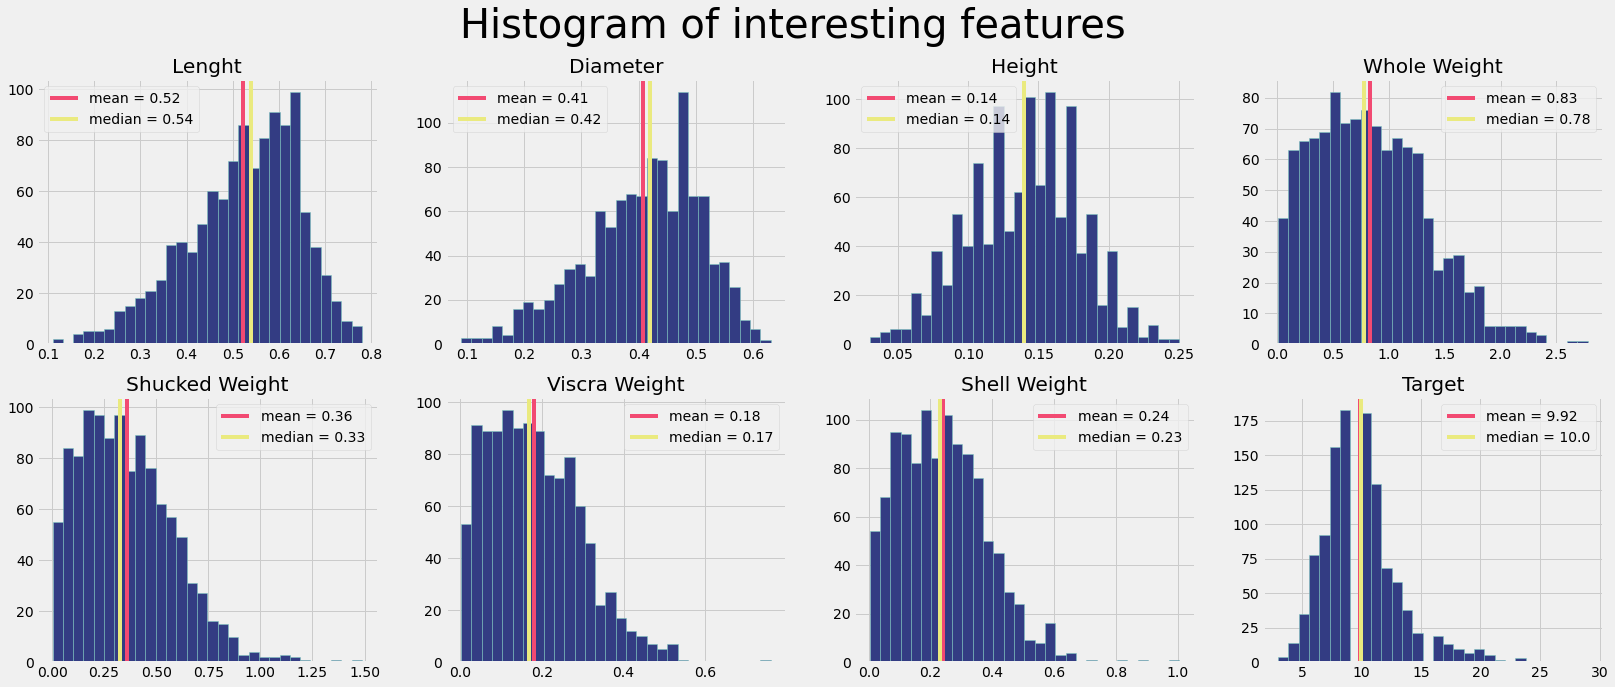

In [ ]:
interest_columns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2,4, figsize =(25, 10))
fig.suptitle('Histogram of interesting features', fontsize = 40)
column_idx =0
for i in range(2):
  for j in range(4):
    ax[i][j].hist(train[interest_columns[column_idx]], bins = 30, color = '#333C83', edgecolor = '#7bcabf')
    ax[i][j].set_title(interest_columns[column_idx])
    ax[i][j].axvline(data_description[interest_columns[column_idx]]['mean'], c = '#F24A72', label = f"mean = {round(data_description[interest_columns[column_idx]]['mean'], 2)}")
    ax[i][j].axvline(data_description[interest_columns[column_idx]]['50%'], c = '#EAEA7F', label = f"median = {round(data_description[interest_columns[column_idx]]['50%'], 2)}")
    ax[i][j].legend()
    column_idx += 1

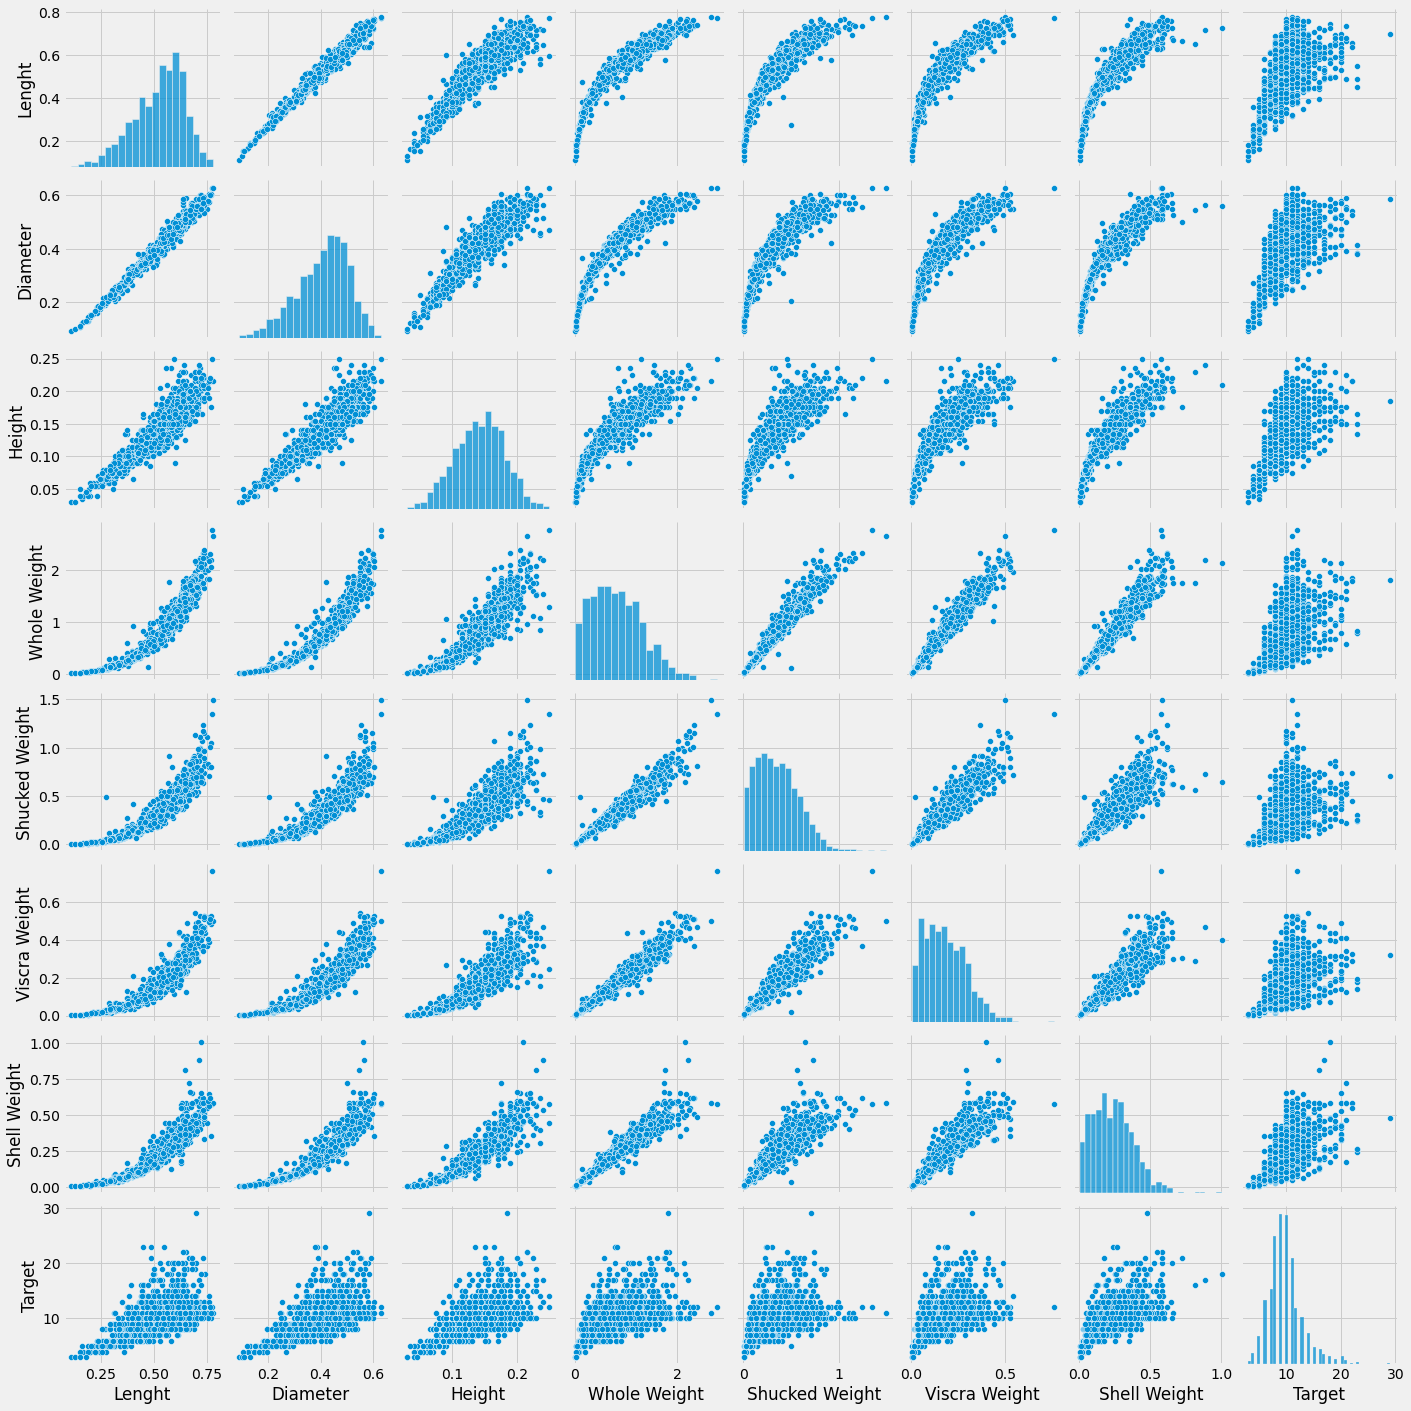

In [ ]:
sns.pairplot(train[numerical_features])

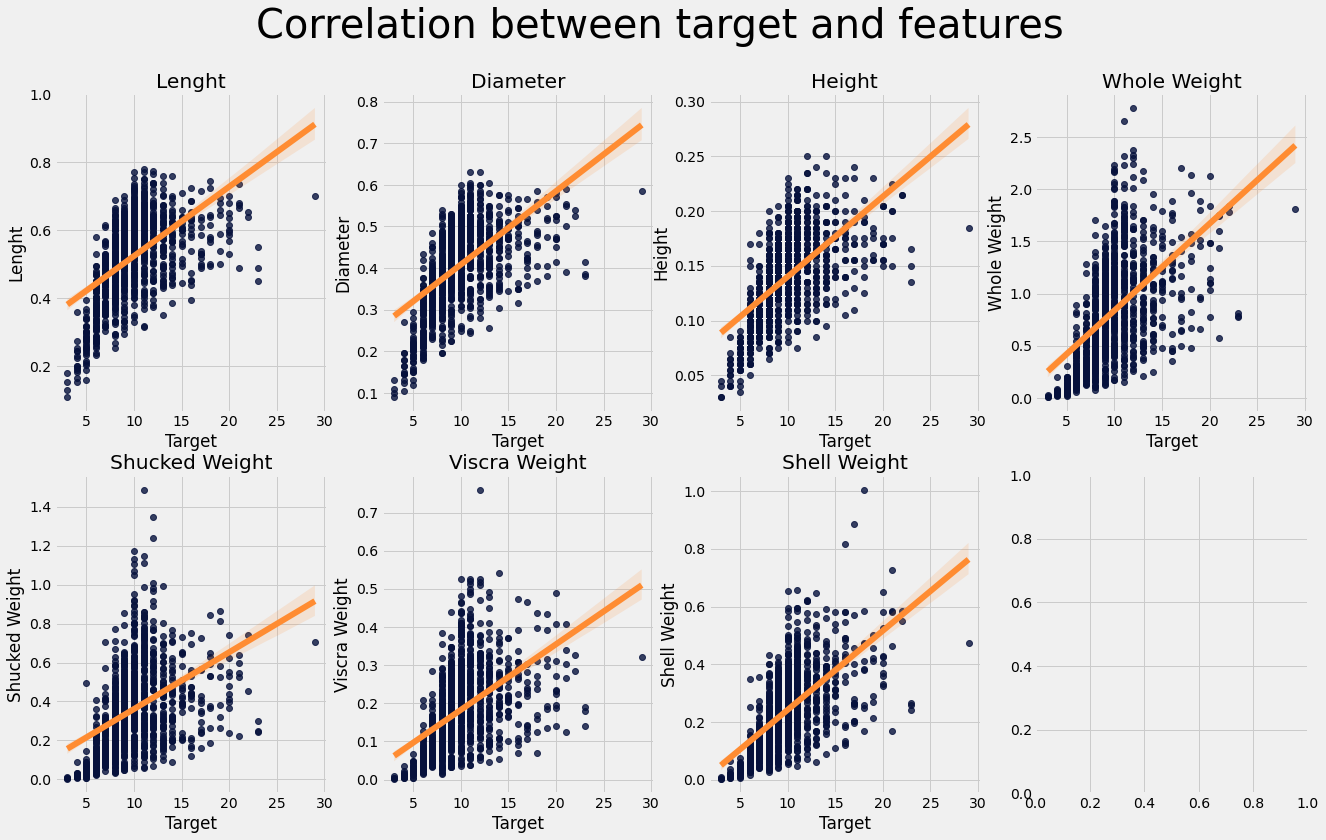

In [ ]:
def visualize(axx, yfield):
  sns.regplot(x = 'Target', y=yfield, data=train, color = '#06113C', line_kws = {'color': '#FF8C32'}, ax = axx) #regplot을 이용해 추세선과 산점도 그래프를 그림
  axx.set_title(yfield)

figure, ((ax1, ax2, ax3, ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows =2,ncols =4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize = 40)
for i in range(len(train.columns[1:-1])): #column이 0부터 시작하면 gender도 포함하게 됨
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

In [ ]:
#pearson correlation analysis
#수치형 데이터 상관관계 히트맵 시각화
train_corr = train.drop(columns = ['Gender'], axis = 1)
scaler = MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method = 'pearson')

Text(0.5, 1.0, 'Correlation between features')

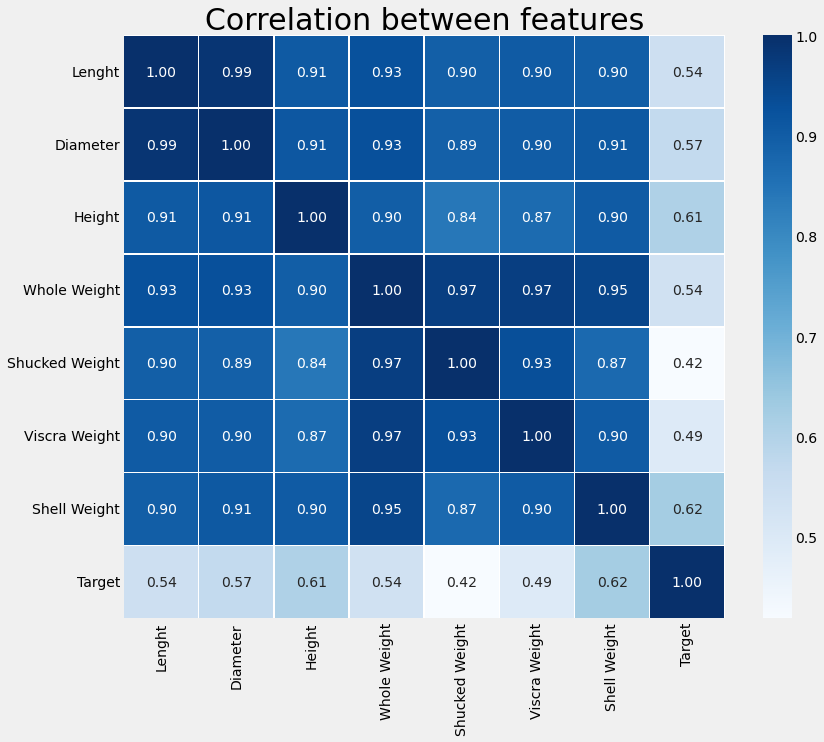

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data = corr28, annot = True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.title('Correlation between features', fontsize = 30)

In [ ]:
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending = False), columns = ['Target'])
df_temp28.style.background_gradient(cmap = 'viridis')

,Target
Target,1.000000
Shell Weight,0.624020
Height,0.606440
Diameter,0.569380
Lenght,0.544288
Whole Weight,0.536748
Viscra Weight,0.494249
Shucked Weight,0.418847


In [ ]:
a_train = train[train['Target']<10]

plt.figure(figsize = (12, 10))
corr = a_train.corr(method = 'pearson')

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Abalone < 10')

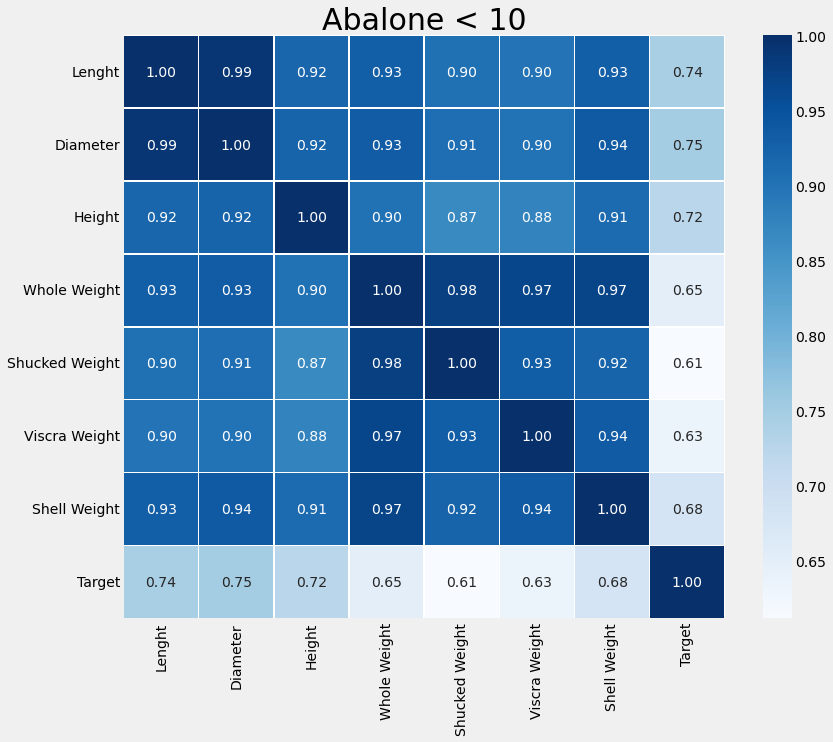

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data = corr, annot = True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.title('Abalone < 10', fontsize = 30)

In [ ]:
a_train = train[train['Target']>10]

plt.figure(figsize = (12, 10))
corr = a_train.corr(method = 'pearson')

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Abalone > 10')

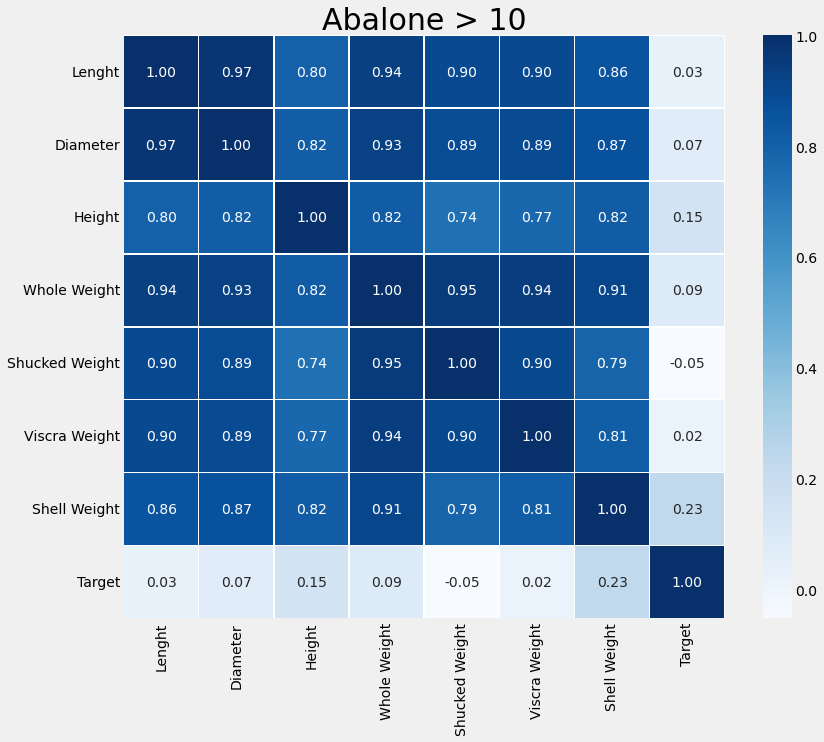

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data = corr, annot = True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.title('Abalone > 10', fontsize = 30)

In [ ]:
s = corr.unstack()
df_temp28 = pd.DataFrame(s['Target'].sort_values(ascending = False), columns = ['Target'])
df_temp28.style.background_gradient(cmap = 'viridis')

,Target
Target,1.000000
Shell Weight,0.229449
Height,0.148780
Whole Weight,0.087233
Diameter,0.067882
Lenght,0.033058
Viscra Weight,0.015105
Shucked Weight,-0.052377


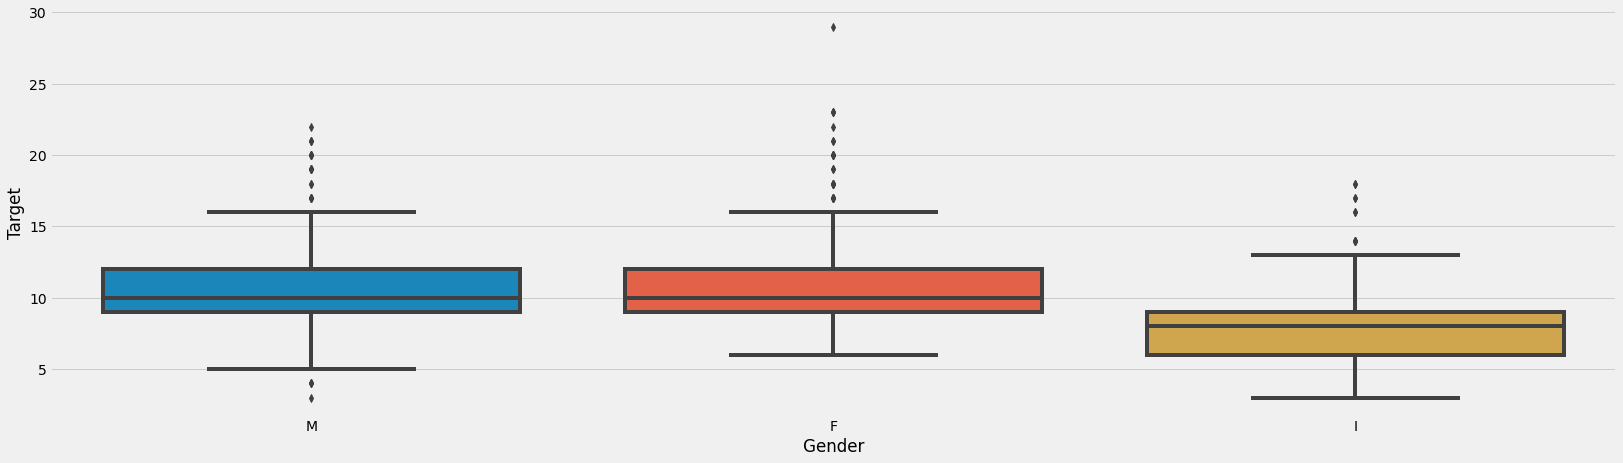

In [ ]:
sns.boxplot(x = 'Gender', y = 'Target', data = train)

#EDA 요약
* 나이가 F, M, I 순으로 젊고
* target을 제외한 나머지 데이터들은 target과 선형적인 관계 while 10살

#Outlier 제거

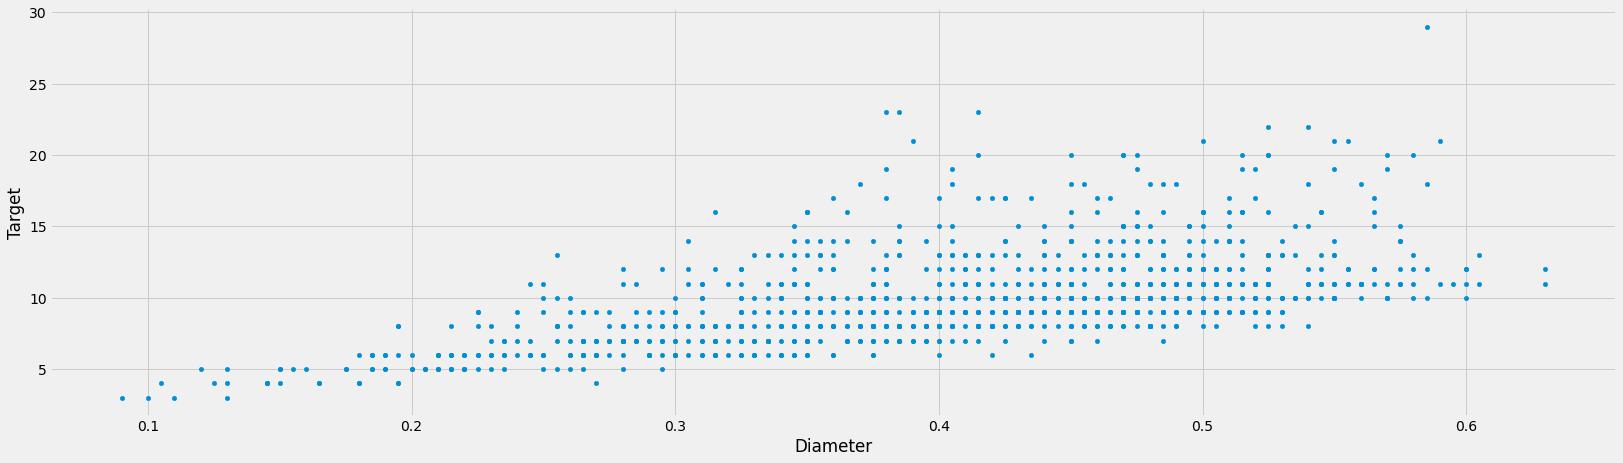

In [ ]:
train_plot = pd.concat([train['Diameter'], train['Target']], axis=1)
train_plot.plot.scatter(x='Diameter', y ='Target')

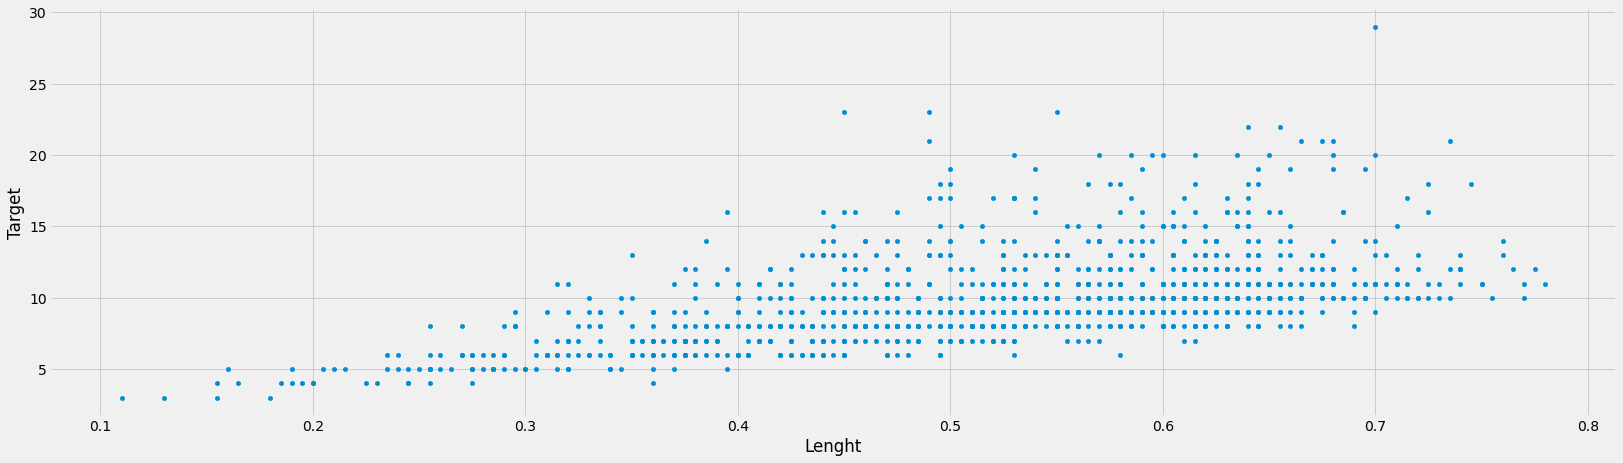

In [ ]:
train_plot = pd.concat([train['Lenght'], train['Target']], axis=1)
train_plot.plot.scatter(x='Lenght', y ='Target')

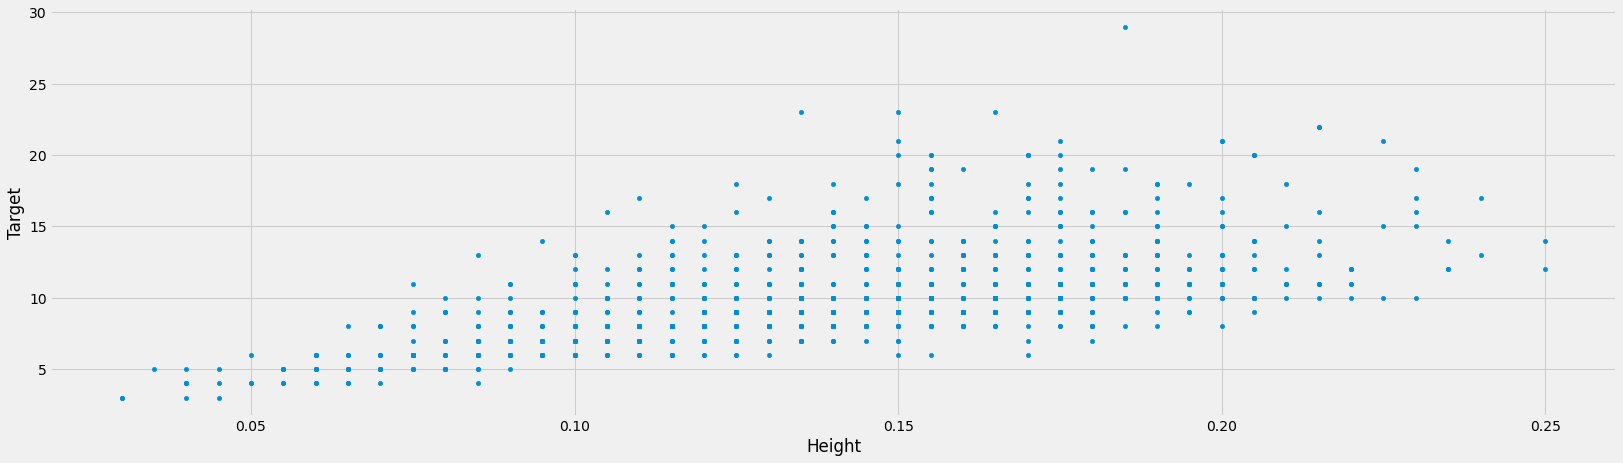

In [ ]:
train_plot = pd.concat([train['Height'], train['Target']], axis=1)
train_plot.plot.scatter(x='Height', y ='Target')

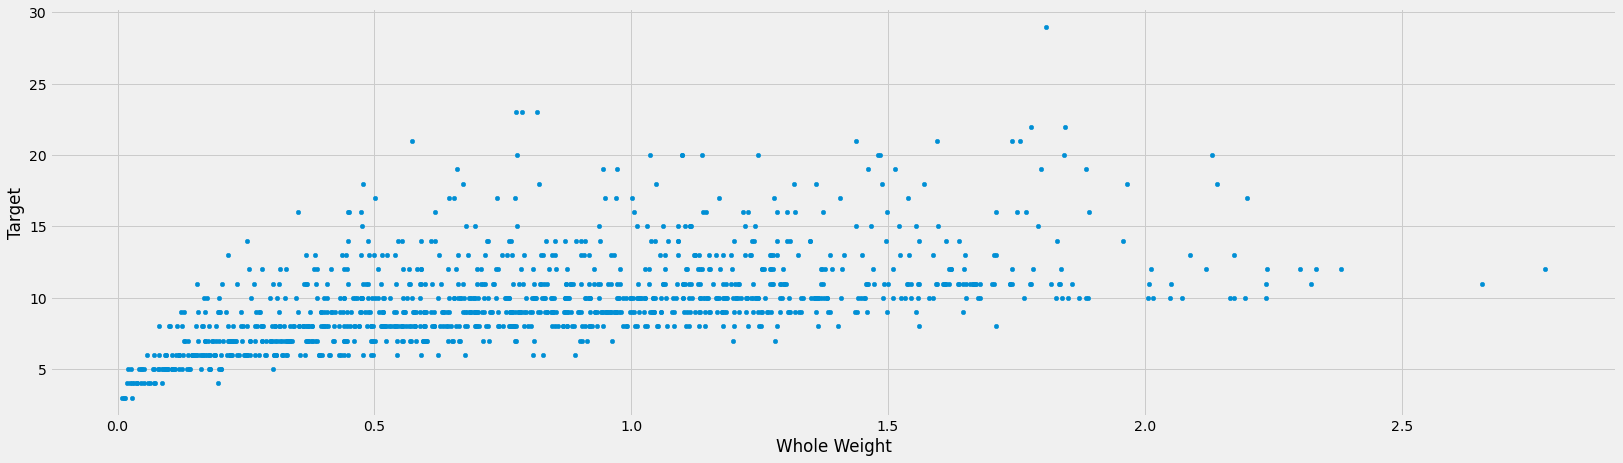

In [ ]:
train_plot = pd.concat([train['Whole Weight'], train['Target']], axis=1)
train_plot.plot.scatter(x='Whole Weight', y ='Target')


In [ ]:
train = train.drop(train[(train['Whole Weight']>2.5)].index)

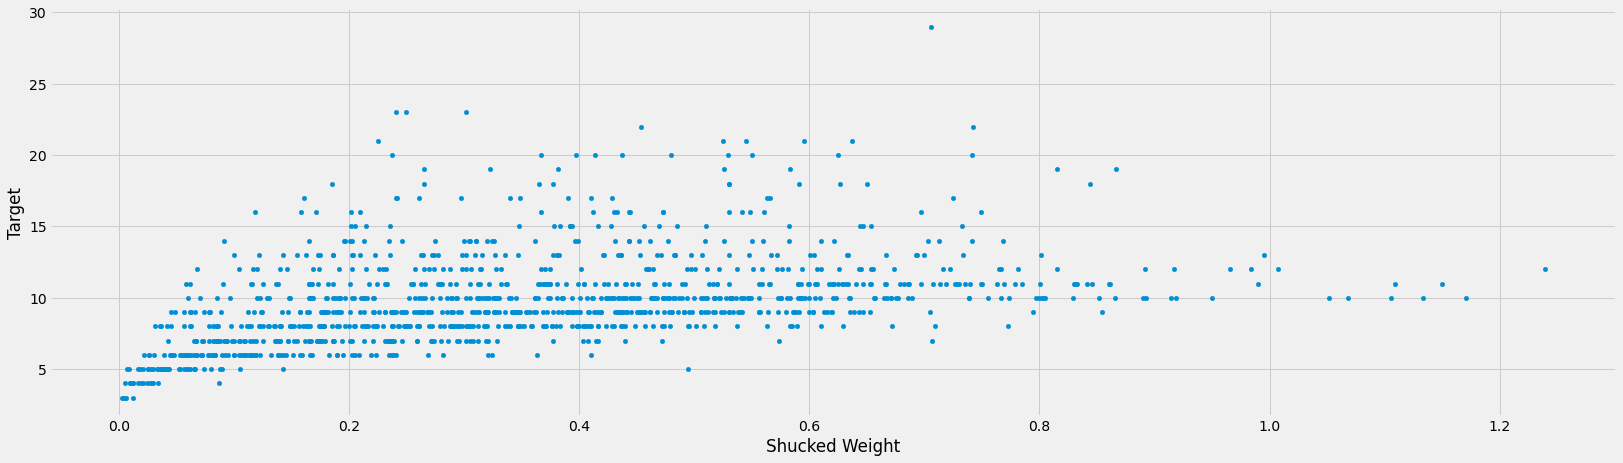

In [ ]:
train_plot = pd.concat([train['Shucked Weight'], train['Target']], axis=1)
train_plot.plot.scatter(x='Shucked Weight', y ='Target')

In [ ]:
train = train.drop(train[(train['Shucked Weight']>1.2)].index)

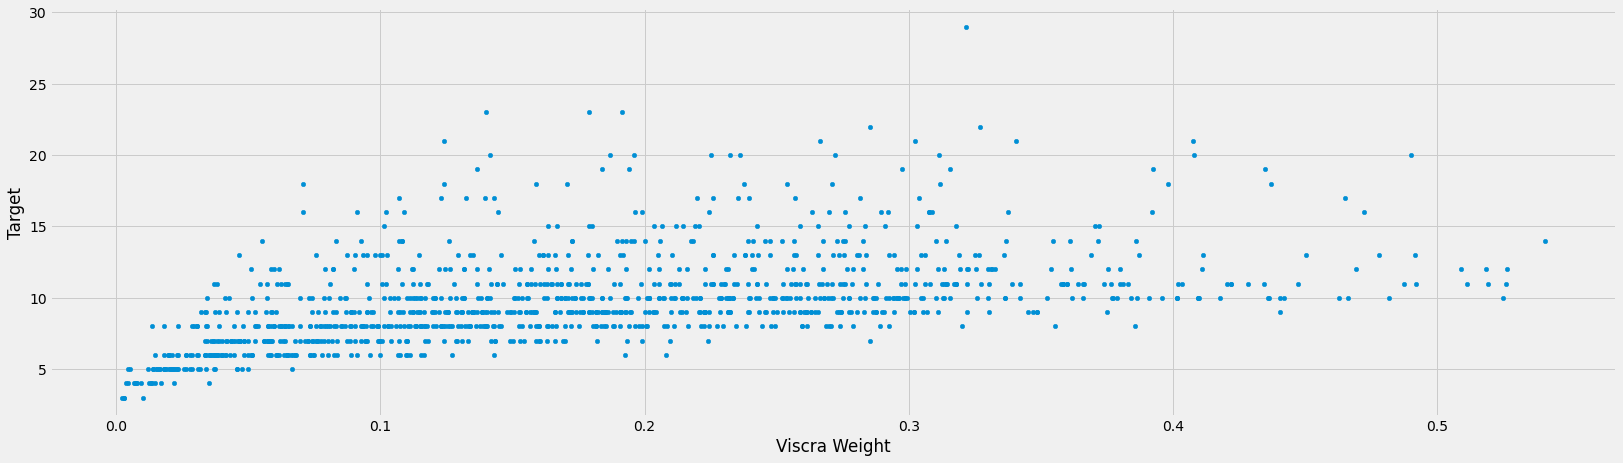

In [ ]:
train_plot = pd.concat([train['Viscra Weight'], train['Target']], axis=1)
train_plot.plot.scatter(x='Viscra Weight', y ='Target')

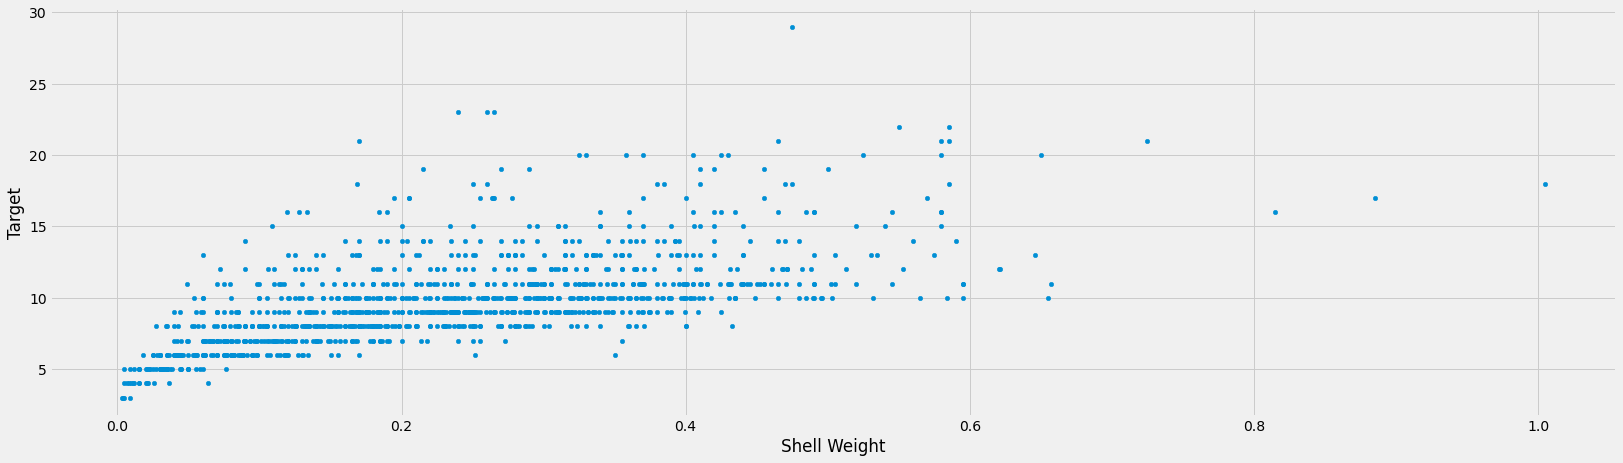

In [ ]:
train_plot = pd.concat([train['Shell Weight'], train['Target']], axis=1)
train_plot.plot.scatter(x='Shell Weight', y ='Target')

#모델 선정 (regressor)
* Random forest
* Gradient Boost
* XGBoost
* lightgbm


In [ ]:
def preprocessing_add_features(df):
  encoder = LabelEncoder()
  #gender encoding
  df.Gender=encoder.fit_transform(df.Gender)
  df['Water'] = df['Whole Weight'] - (df['Shucked Weight'] + df['Viscra Weight'] + df['Shell Weight'])
  df['Round'] = df['Lenght'] + df['Diameter'] + df['Height']
  df['Volume'] = df['Lenght'] * df['Diameter'] * df['Height']


  return df

In [ ]:
train = preprocessing_add_features(train)

In [ ]:
train.describe()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Water,Round,Volume
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,1.064947,0.522282,0.406508,0.139239,0.827304,0.356231,0.180498,0.238903,9.916370,0.051672,1.068029,0.034562
std,0.819540,0.120607,0.099966,0.038855,0.494388,0.219673,0.110936,0.141284,3.239634,0.060058,0.255764,0.021288
min,0.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000,-0.440000,0.230000,0.000297
25%,0.000000,0.445000,0.345000,0.110000,0.440000,0.180500,0.092375,0.127500,8.000000,0.018000,0.910000,0.017339
50%,1.000000,0.535000,0.420000,0.140000,0.776750,0.326000,0.168250,0.230000,9.500000,0.035500,1.100000,0.031630
75%,2.000000,0.615000,0.480000,0.165000,1.166250,0.500250,0.257500,0.330000,11.000000,0.070000,1.265000,0.049107
max,2.000000,0.770000,0.605000,0.250000,2.381000,1.170500,0.541000,1.005000,29.000000,0.608000,1.585000,0.101520


In [ ]:
#pearson correlation analysis
#데이터 추가  상관관계 히트맵 시각화
train_corr = train.drop(columns = ['Gender'], axis = 1)
scaler = MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method = 'pearson')

Text(0.5, 1.0, 'Correlation between origin and add features')

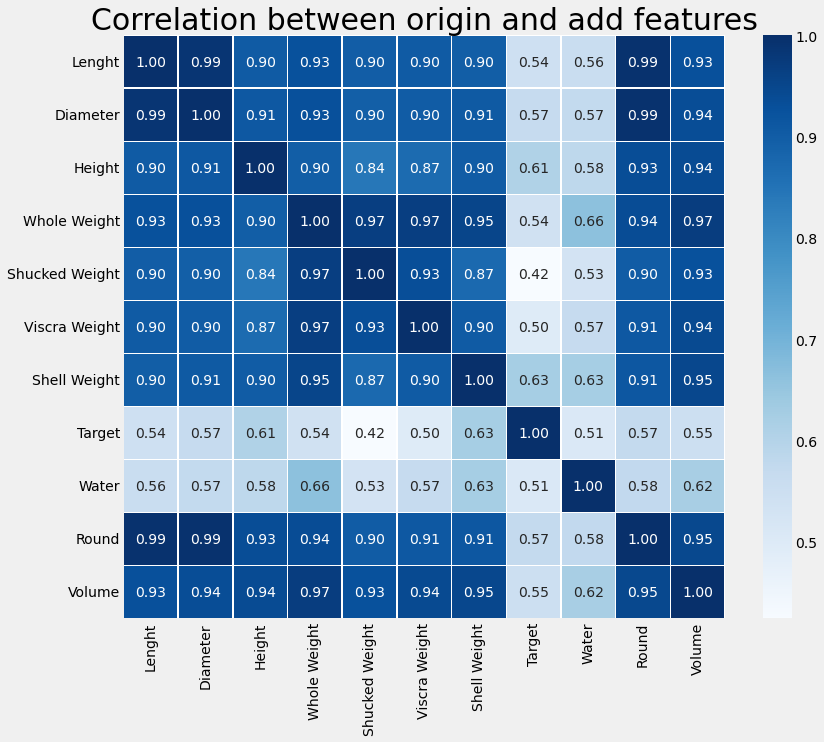

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data = corr28, annot = True, fmt = '.2f', linewidths=.5, cmap = 'Blues')
plt.title('Correlation between origin and add features', fontsize = 30)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Target',1), train['Target'], random_state =10)

In [ ]:
x_train.shape, y_train.shape

((843, 11), (843,))

In [ ]:
x_test.shape, y_test.shape

((281, 11), (281,))

##평가 지표 MSE : 예측값과 실제값의 차이의 제곱에 대해 평균을 냄

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
my_predictions = {}

colors = ['greenyellow', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold','seagreen', 'turquoise', 'steelblue', 'slategray', 'tomato'
         ]

def plot_predictions(name_, actual, pred):
  df = pd.DataFrame({'actual': y_test, 'prediction': pred})
  df = df.sort_values(by='actual').reset_index(drop=True)

  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

# evaluation plot
def mse_eval(name_, actual, pred):
  global predictions
  global colors

  plot_predictions(name_, actual, pred)

  mse = mean_squared_error(actual, pred)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
  
  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)
  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10
  
  length = len(df)
  
  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])
  
  for i, v in enumerate(df['mse']):
      idx = np.random.choice(len(colors))
      bars[i].set_color(colors[idx])
      ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
      
  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)
  
  plt.show()

# remove model
def remove_model(name_):
  global my_predictions
  try:
      del my_predictions[name_]
  except KeyError:
      return False
  return True


# coefficients visulization
def plot_coef(columns, coef):
  coef_df = pd.DataFrame(list(zip(columns, coef)))
  coef_df.columns=['feature', 'coef']
  coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
  
  fig, ax = plt.subplots(figsize=(9, 7))
  ax.barh(np.arange(len(coef_df)), coef_df['coef'])
  idx = np.arange(len(coef_df))
  ax.set_yticks(idx)
  ax.set_yticklabels(coef_df['feature'])
  fig.tight_layout()
  plt.show()


#ensemble
* emsemble 사용 이유
* 일반적인 단일 모델보다 좀 더 좋음
* 모델 학습시, 원하는 것은 분산과 편향이 모두 낮은 모델을 기대 하지만 대부분 낮은 분산, 높은 편향 또는 높은 분산, 낮은 편향을 가짐
* 따라서 이 두 가지의 유형에서 이상적인 분산과 편향이 모두 낮은 모델로 만들기 위해 ensemble 사용


## ensemble 의 효과를 보기 위한 조건들
* 각각의 모델들이 충분한 수준의 다양성을 가지도록 함
* 각각 모델들이 모두 최소한의 성능은 발휘할 수 있어야 함
* 각각 모델들의 결과물을 잘 결합

### Bagging, Boosting, weighted blending 기법 사용

##Bagging

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
'''rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train, y_train)'''

'rfr = RandomForestRegressor(random_state=1)\nrfr.fit(x_train, y_train)'

In [ ]:
rfr = joblib.load('./2018037057_신인철_rfr.pkl')

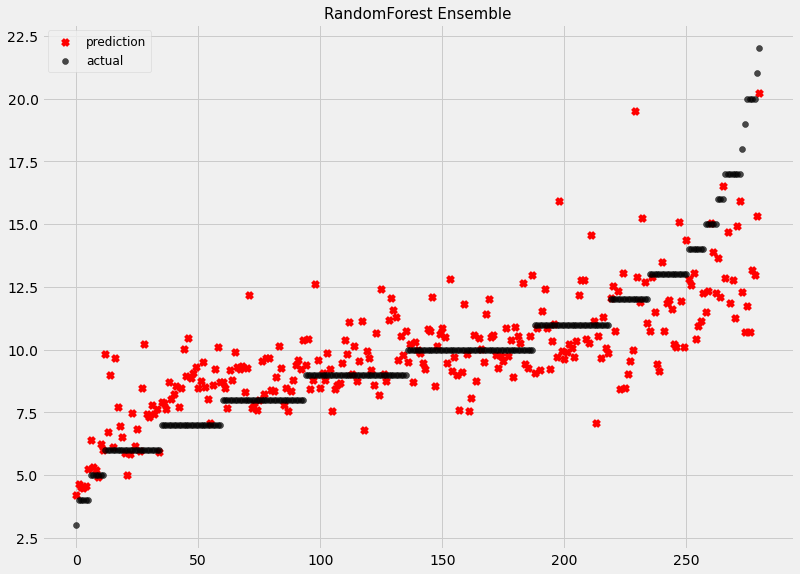

                   model       mse
0  RandomForest Ensemble  4.458843


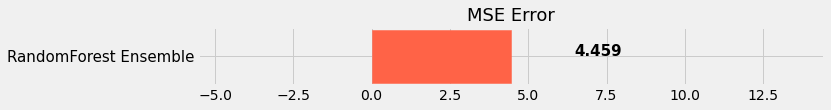

In [ ]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', y_test, rfr_pred)

##Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [ ]:
'''gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(x_train, y_train)'''

'gbr = GradientBoostingRegressor(random_state=1)\ngbr.fit(x_train, y_train)'

In [ ]:
gbr = joblib.load('./2018037057_신인철_gbr.pkl')

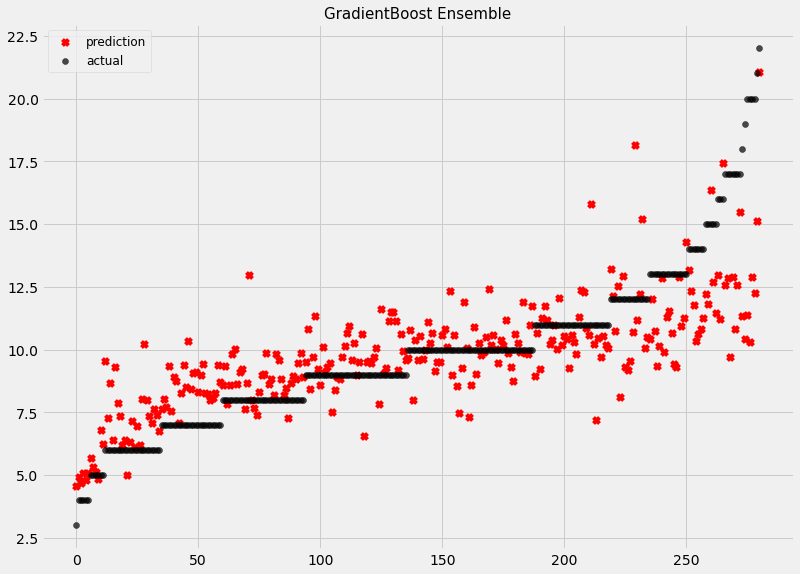

                    model       mse
0  GradientBoost Ensemble  4.707914
1   RandomForest Ensemble  4.458843


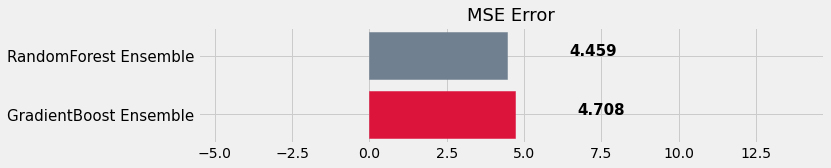

In [ ]:
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', y_test, gbr_pred)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
'''xgb = XGBRegressor(random_state=1)
xgb.fit(x_train, y_train)'''

'xgb = XGBRegressor(random_state=1)\nxgb.fit(x_train, y_train)'

In [ ]:
xgb = joblib.load('./2018037057_신인철_xgb.pkl')

[00:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


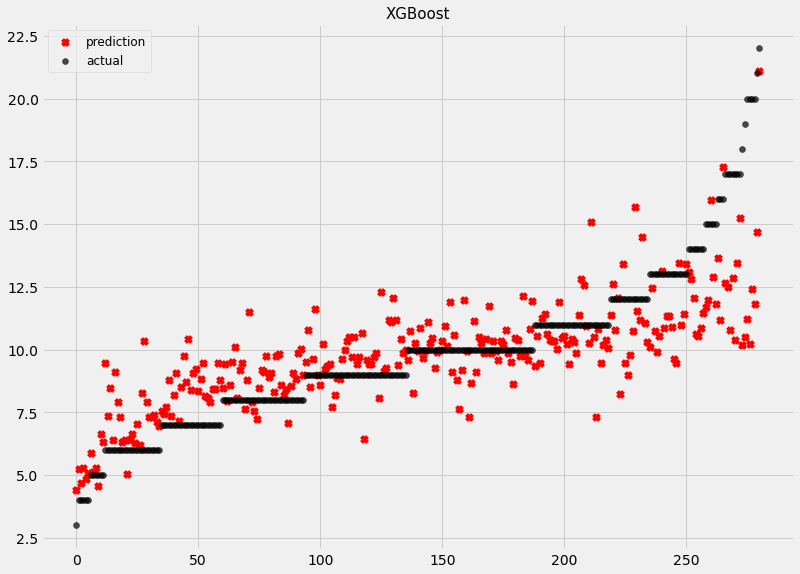

                    model       mse
0  GradientBoost Ensemble  4.707914
1                 XGBoost  4.529924
2   RandomForest Ensemble  4.458843


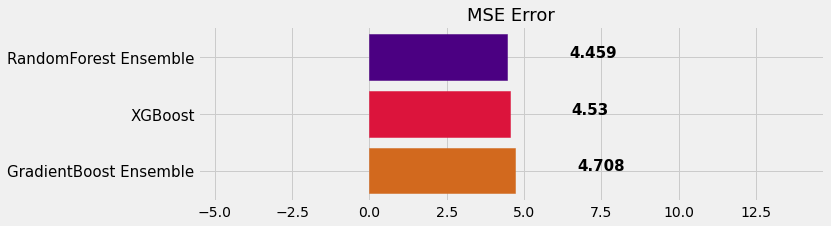

In [ ]:
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', y_test, xgb_pred)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
'''lgbm = LGBMRegressor(random_state=1)
lgbm.fit(x_train, y_train)'''

'lgbm = LGBMRegressor(random_state=1)\nlgbm.fit(x_train, y_train)'

In [ ]:
lgbm = joblib.load('./2018037057_신인철_lgbm.pkl')

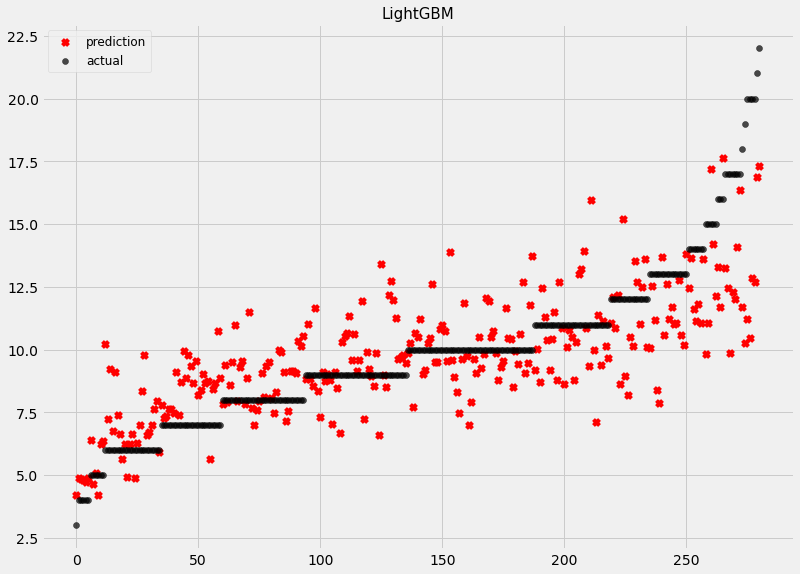

                    model       mse
0                LightGBM  4.986829
1  GradientBoost Ensemble  4.707914
2                 XGBoost  4.529924
3   RandomForest Ensemble  4.458843


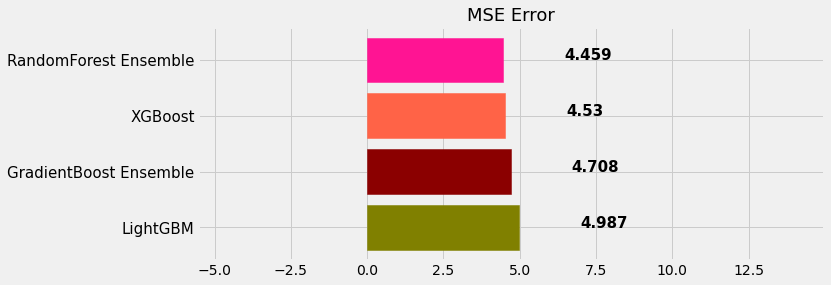

In [ ]:
lgbm_pred = lgbm.predict(x_test)
mse_eval('LightGBM', y_test, lgbm_pred)

##Weighted Blending
* 각 모델의 예측값에 대해 weight를 곱해 최종 output을 산출함

In [ ]:
final_outputs ={
  'randomforest' : rfr_pred,
  'xgboost' : xgb_pred,
  'lgbm' : lgbm_pred,
  'gradientboost' : gbr_pred
}

In [ ]:
final_prediction=\
final_outputs['randomforest'] * 0.35\
+final_outputs['xgboost']*0.35\
+final_outputs['gradientboost']*0.2\
+final_outputs['lgbm']*0.1

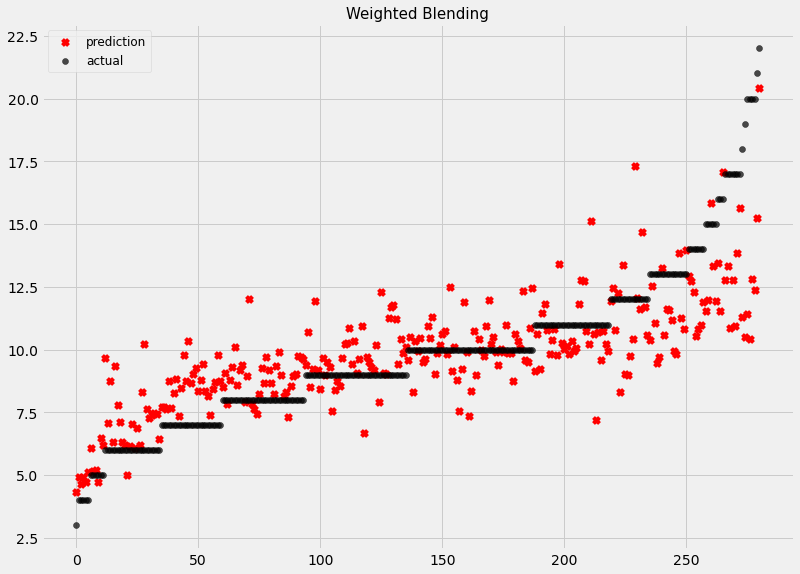

                    model       mse
0                LightGBM  4.986829
1  GradientBoost Ensemble  4.707914
2                 XGBoost  4.529924
3   RandomForest Ensemble  4.458843
4       Weighted Blending  4.420436


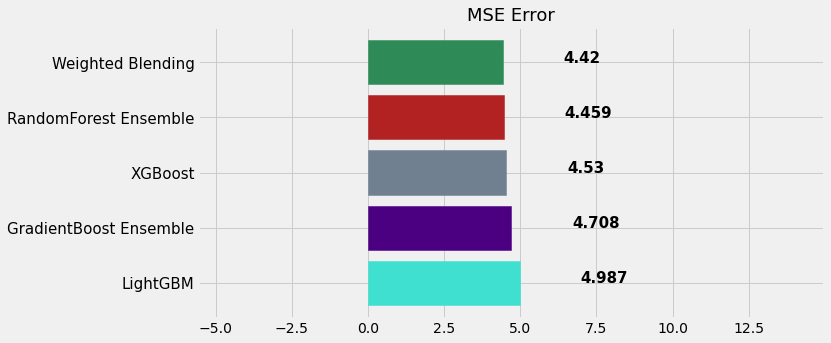

In [ ]:
mse_eval('Weighted Blending', y_test, final_prediction)

# 변수 중요도

##Random Forest 변수 중요도

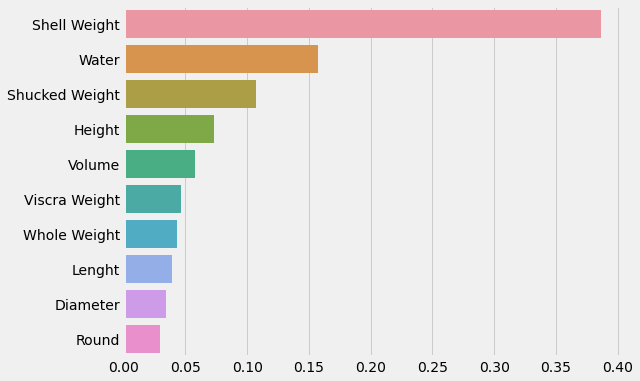

In [ ]:
imp_value = rfr.feature_importances_
imp = pd.Series(imp_value, index = x_train.columns)
imp_top = imp.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=imp_top, y=imp_top.index)
plt.show()

##XGBoost 변수 중요도

In [ ]:
import xgboost

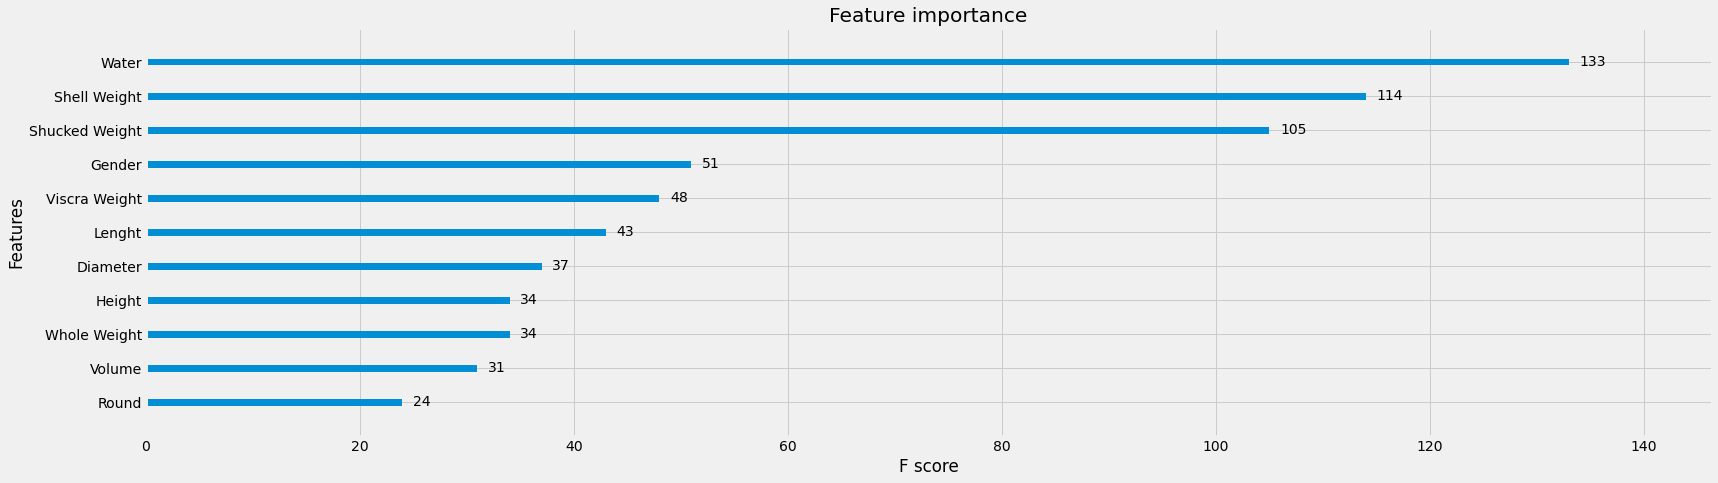

In [ ]:
xgboost.plot_importance(xgb)

##Gradient Boost

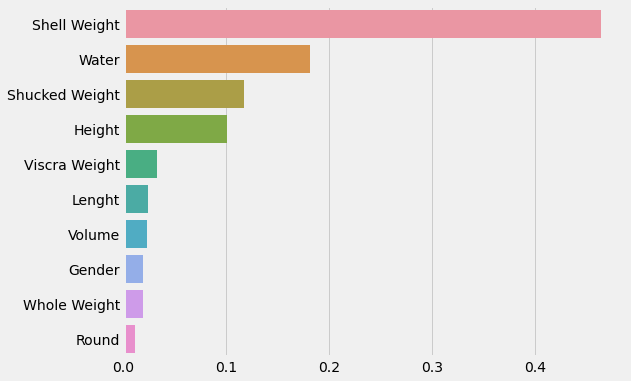

In [ ]:
imp_value = gbr.feature_importances_
imp = pd.Series(imp_value, index = x_train.columns)
imp_top = imp.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=imp_top, y=imp_top.index)
plt.show()

##light boost

In [ ]:
import lightgbm

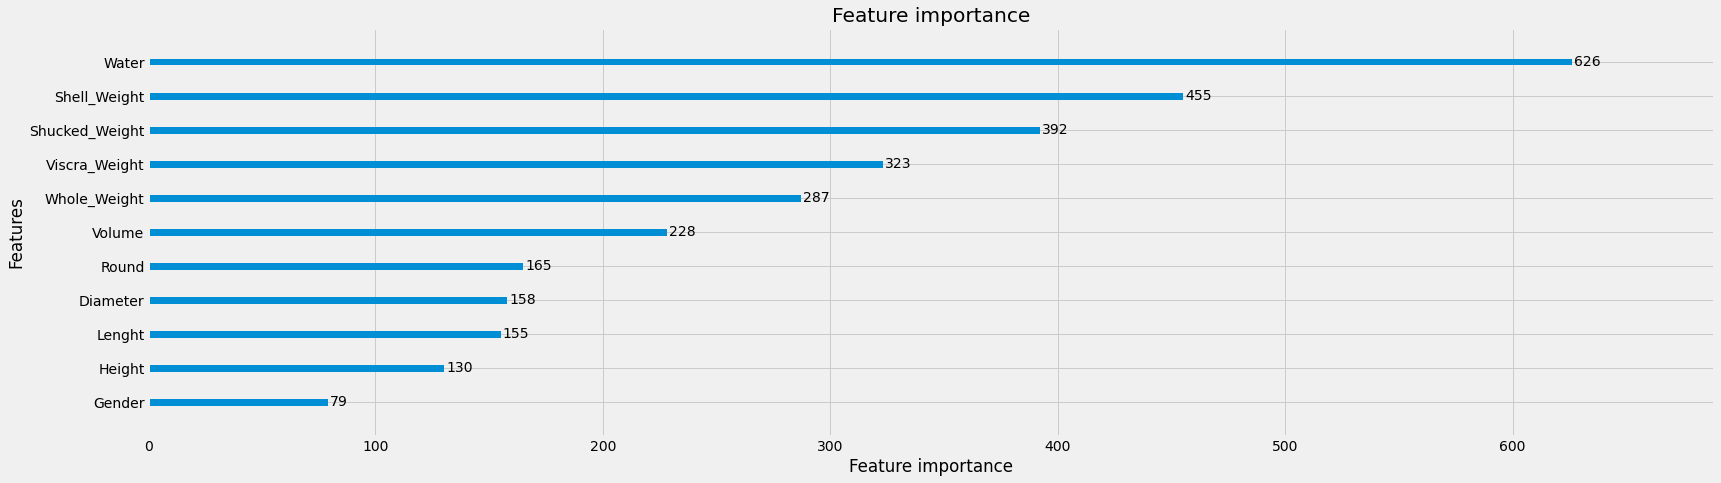

In [ ]:
lightgbm.plot_importance(lgbm)

#한계점, 개선방법

* hyper parameter tuning
* weighted blending의 weight
* 중간나이 구분을 도와줄 변수

In [ ]:
test = pd.read_csv('./test2.csv')

In [ ]:
test = test.drop(columns = ['id'],axis = 1)
test = test.drop(columns = ['Unnamed: 0'],axis = 1)

In [ ]:
test = preprocessing_add_features(test)

In [ ]:
x_test = test.drop('Target',1)
y_test = test['Target']

In [ ]:
x_test

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Water,Round,Volume
0,0,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.1450,0.0025,0.910,0.019031
1,2,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.2850,0.0715,1.085,0.034217
2,2,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.1550,0.0170,0.905,0.013392
3,1,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.0820,-0.0330,0.770,0.010260
4,2,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.1750,0.0360,1.025,0.024863
...,...,...,...,...,...,...,...,...,...,...,...
121,2,0.605,0.490,0.165,1.1245,0.4920,0.2220,0.3555,0.0550,1.260,0.048914
122,2,0.590,0.470,0.155,1.1735,0.6245,0.2330,0.2595,0.0565,1.215,0.042981
123,0,0.750,0.565,0.215,1.9380,0.7735,0.4825,0.5750,0.1070,1.530,0.091106
124,2,0.435,0.335,0.110,0.4385,0.2075,0.0715,0.1315,0.0280,0.880,0.016030


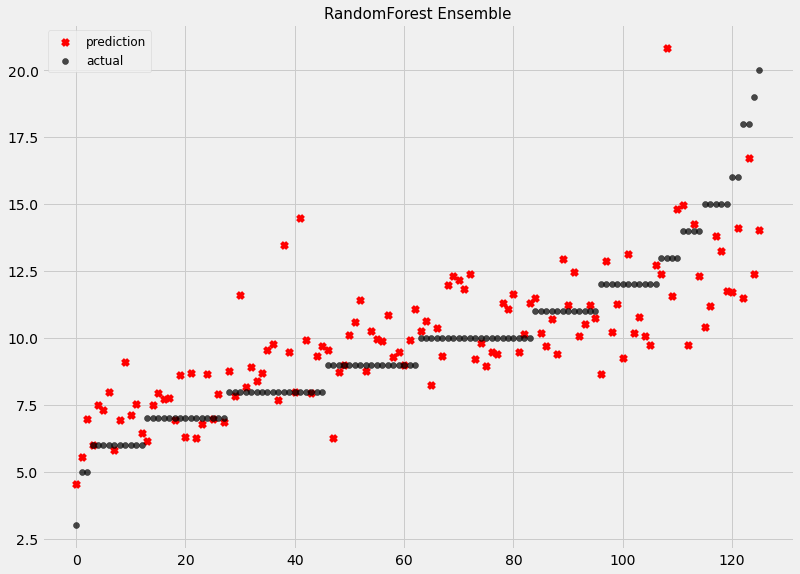

                    model       mse
0                LightGBM  4.986829
1  GradientBoost Ensemble  4.707914
2                 XGBoost  4.529924
3       Weighted Blending  4.420436
4   RandomForest Ensemble  4.346113


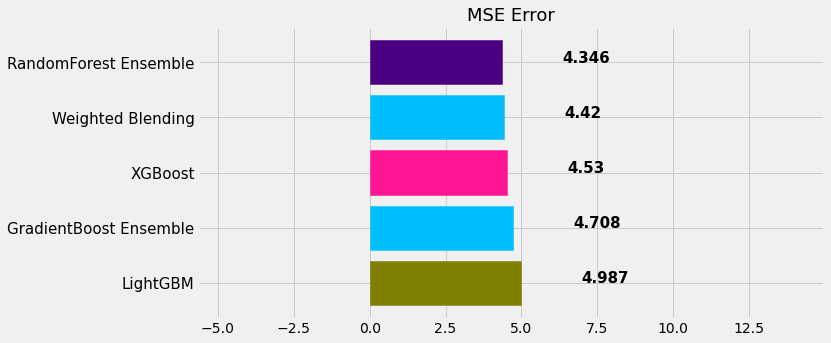

In [ ]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', y_test, rfr_pred)

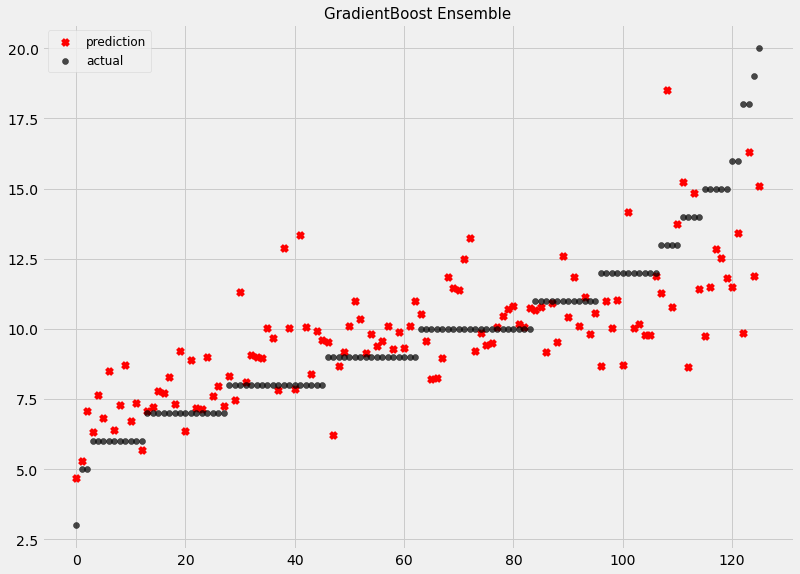

                    model       mse
0                LightGBM  4.986829
1                 XGBoost  4.529924
2  GradientBoost Ensemble  4.460214
3       Weighted Blending  4.420436
4   RandomForest Ensemble  4.346113


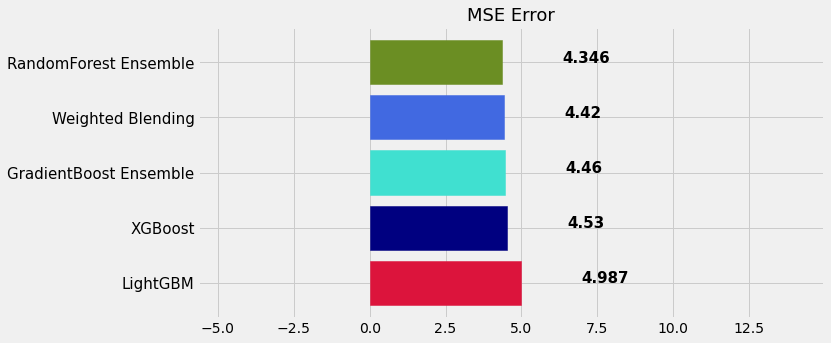

In [ ]:
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', y_test, gbr_pred)

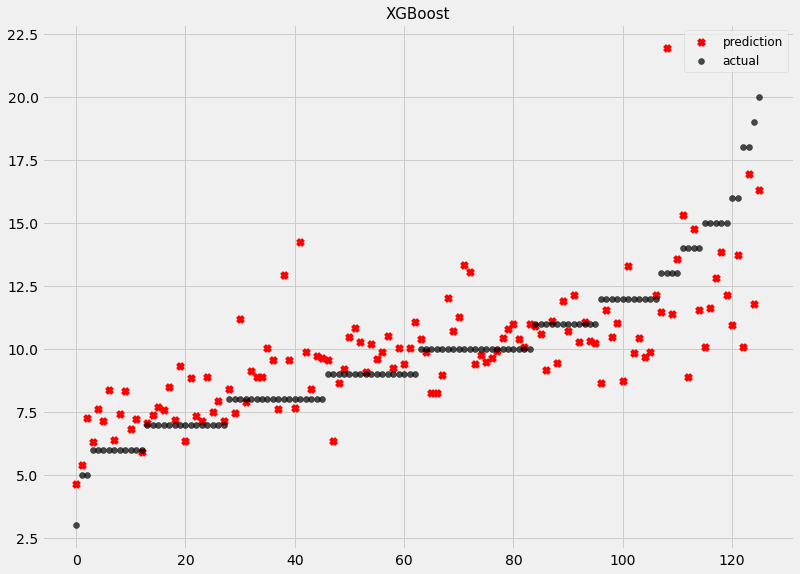

                    model       mse
0                LightGBM  4.986829
1                 XGBoost  4.664149
2  GradientBoost Ensemble  4.460214
3       Weighted Blending  4.420436
4   RandomForest Ensemble  4.346113


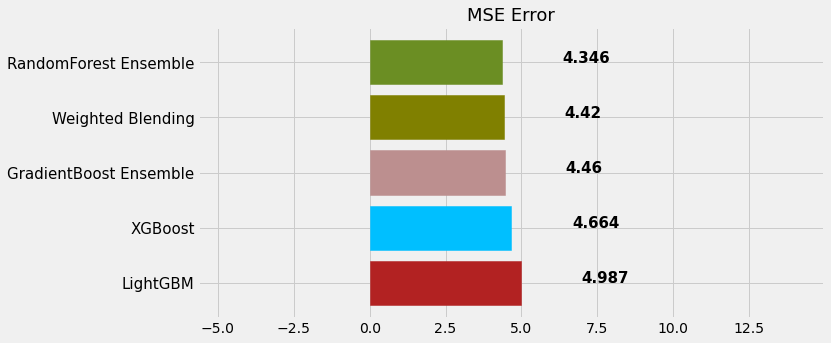

In [ ]:
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', y_test, xgb_pred)

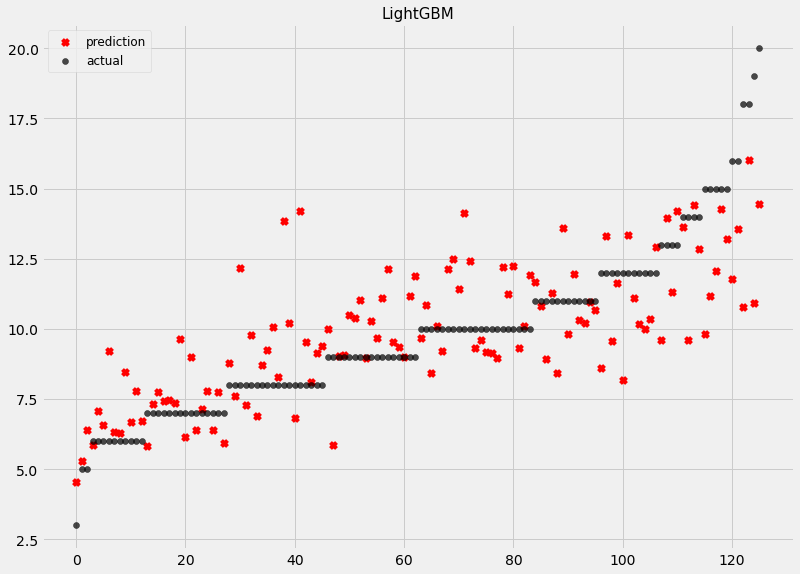

                    model       mse
0                LightGBM  4.778571
1                 XGBoost  4.664149
2  GradientBoost Ensemble  4.460214
3       Weighted Blending  4.420436
4   RandomForest Ensemble  4.346113


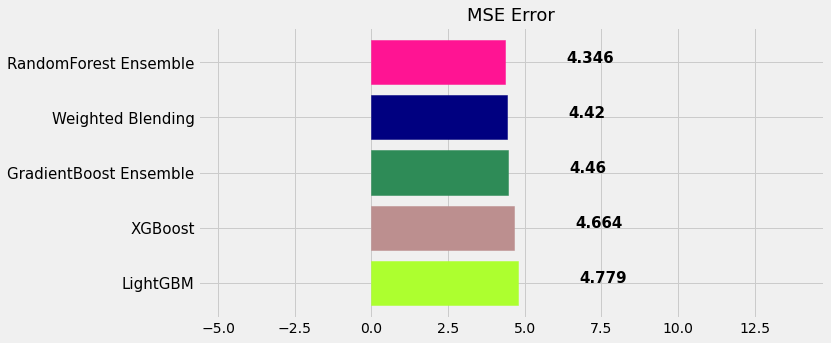

In [ ]:
lgbm_pred = lgbm.predict(x_test)
mse_eval('LightGBM', y_test, lgbm_pred)

In [ ]:
final_outputs ={
  'randomforest' : rfr_pred,
  'xgboost' : xgb_pred,
  'lgbm' : lgbm_pred,
  'gradientboost' : gbr_pred
}

In [ ]:
final_prediction=\
final_outputs['randomforest'] * 0.35\
+final_outputs['xgboost']*0.35\
+final_outputs['gradientboost']*0.2\
+final_outputs['lgbm']*0.1

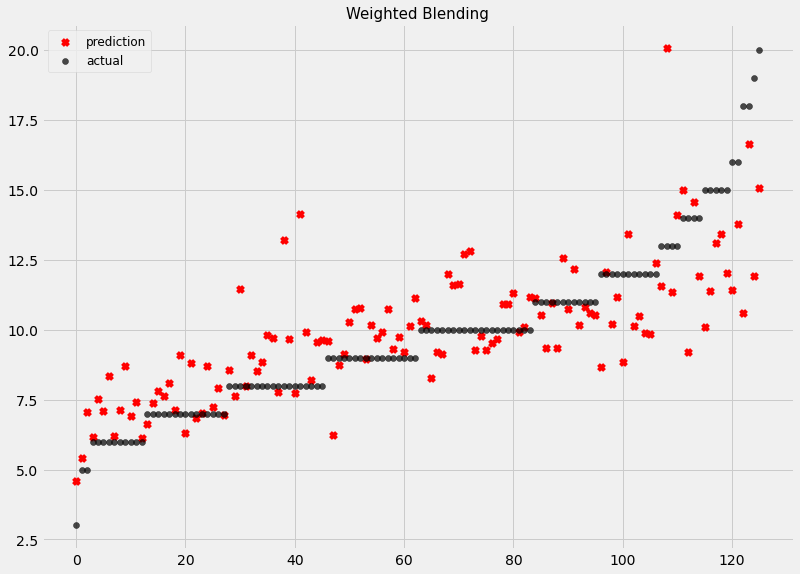

                    model       mse
0                LightGBM  4.778571
1                 XGBoost  4.664149
2  GradientBoost Ensemble  4.460214
3       Weighted Blending  4.350731
4   RandomForest Ensemble  4.346113


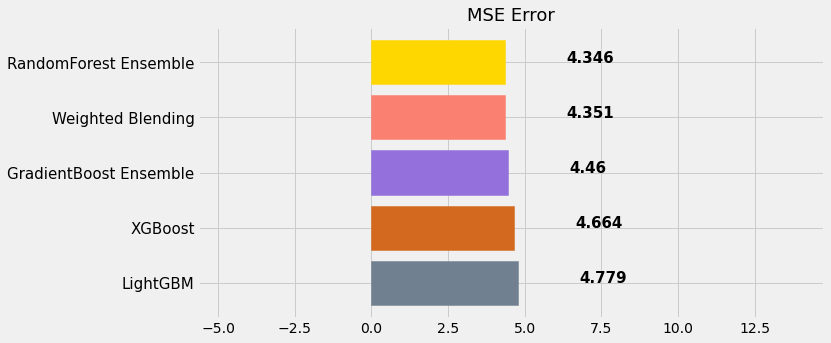

In [ ]:
mse_eval('Weighted Blending', y_test, final_prediction)